## Dependencies
First, we load the required dependencies. 

In [1]:
## load dependencies
from imbalance_metrics import regression_metrics as rm
import pandas as pd 
import numpy as np
import smogn
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns


## Data
After, we load our data. In this example, we use the Ames Housing Dataset training split retreived from Kaggle, originally complied by Dean De Cock. 
Link to original dataset - https://www.kaggle.com/datasets/prevek18/ames-housing-dataset


In [2]:
## load data
df = pd.read_csv(
    'https://raw.githubusercontent.com/paobranco/ImbalanceMetrics/main/data/housing.csv', index_col=None, na_values=['NA']
)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
oversample = RandomOverSampler(sampling_strategy='all')
_, y_os = oversample.fit_resample(df.drop(columns="SalePrice"), df["SalePrice"])

In [4]:
## specify phi relevance values
rg_mtrx1 = [

    [35000,  1, 0],  ## over-sample ("minority")
    [125000, 0, 0],  ## under-sample ("majority")
    [200000, 0, 0],  ## under-sample
    [250000, 0, 0],  ## under-sample
]

In [5]:
## specify phi relevance values
rg_mtrx2 = [

    [35000,  1, 0],  ## over-sample ("minority")
    [125000, 0, 0],  ## under-sample ("majority")
    [200000, 0, 0],  ## under-sample
    [250000, 1, 0],  ## over-sample
]

In [6]:

## conduct smogn
df_smogn1 = smogn.smoter(
    
    ## main arguments
    data = df,           ## pandas dataframe
    y = 'SalePrice',          ## string ('header name')
    k = 7,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'balance',  ## string ('balance' or 'extreme')
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.10,         ## real number (0 < R < 1)
    rel_method = 'manual',    ## string ('auto' or 'manual')
    # rel_xtrm_type = 'both', ## unused (rel_method = 'manual')
    # rel_coef = 1.50,        ## unused (rel_method = 'manual')
    rel_ctrl_pts_rg = rg_mtrx1 ## 2d array (format: [x, y])
)


c:\Users\srtul\AppData\Local\Programs\Python\Python310\lib\site-packages\smogn\smoter.py:200: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  b_index.update({i: y_sort[bumps[i]:bumps[i + 1]]})
c:\Users\srtul\AppData\Local\Programs\Python\Python310\lib\site-packages\smogn\over_sampling.py:128: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, j] = pd.Categorical(pd.factorize(
c:\Users\srtul\AppData\Local\Programs\Python\Python310\lib\site-packages\smogn\over_sampling.py:128: FutureWarning: In a future version

In [7]:
## conduct smogn
df_smogn2 = smogn.smoter(
    
    ## main arguments
    data = df,           ## pandas dataframe
    y = 'SalePrice',          ## string ('header name')
    k = 7,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.10,         ## real number (0 < R < 1)
    rel_method = 'manual',    ## string ('auto' or 'manual')
    # rel_xtrm_type = 'both', ## unused (rel_method = 'manual')
    # rel_coef = 1.50,        ## unused (rel_method = 'manual')
    rel_ctrl_pts_rg = rg_mtrx2 ## 2d array (format: [x, y])
)


c:\Users\srtul\AppData\Local\Programs\Python\Python310\lib\site-packages\smogn\smoter.py:200: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  b_index.update({i: y_sort[bumps[i]:bumps[i + 1]]})
c:\Users\srtul\AppData\Local\Programs\Python\Python310\lib\site-packages\smogn\over_sampling.py:128: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, j] = pd.Categorical(pd.factorize(
c:\Users\srtul\AppData\Local\Programs\Python\Python310\lib\site-packages\smogn\over_sampling.py:128: FutureWarning: In a future version

In [8]:
## conduct smogn
df_smogn_auto = smogn.smoter(
    
    ## main arguments
    data = df,           ## pandas dataframe
    y = 'SalePrice',          ## string ('header name')
    k = 7,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'balance',  ## string ('balance' or 'extreme')
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.10,         ## real number (0 < R < 1)
    rel_method = 'auto',    ## string ('auto' or 'manual')
    # rel_xtrm_type = 'both', ## unused (rel_method = 'manual')
    # rel_coef = 1.50,        ## unused (rel_method = 'manual')
    #rel_ctrl_pts_rg = rg_mtrx1 ## 2d array (format: [x, y])
)


c:\Users\srtul\AppData\Local\Programs\Python\Python310\lib\site-packages\smogn\smoter.py:200: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  b_index.update({i: y_sort[bumps[i]:bumps[i + 1]]})
c:\Users\srtul\AppData\Local\Programs\Python\Python310\lib\site-packages\smogn\over_sampling.py:128: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, j] = pd.Categorical(pd.factorize(
c:\Users\srtul\AppData\Local\Programs\Python\Python310\lib\site-packages\smogn\over_sampling.py:128: FutureWarning: In a future version

In [9]:
# Assign y values from the dataframe
y = df['SalePrice'].values
y_smogn1 = df_smogn1['SalePrice'].values
y_smogn2 = df_smogn2['SalePrice'].values
y_smogn_auto = df_smogn_auto['SalePrice'].values

In [10]:
rel_y = rm.calculate_phi(y)

In [11]:
rel_y_smogn1= rm.calculate_phi(y_smogn1)

In [12]:
rel_y_smogn2= rm.calculate_phi(y_smogn2)

In [13]:
rel_y_smogn_auto= rm.calculate_phi(y_smogn_auto)

In [14]:
rel_y_os= rm.calculate_phi(y_os)

In [15]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns



[]

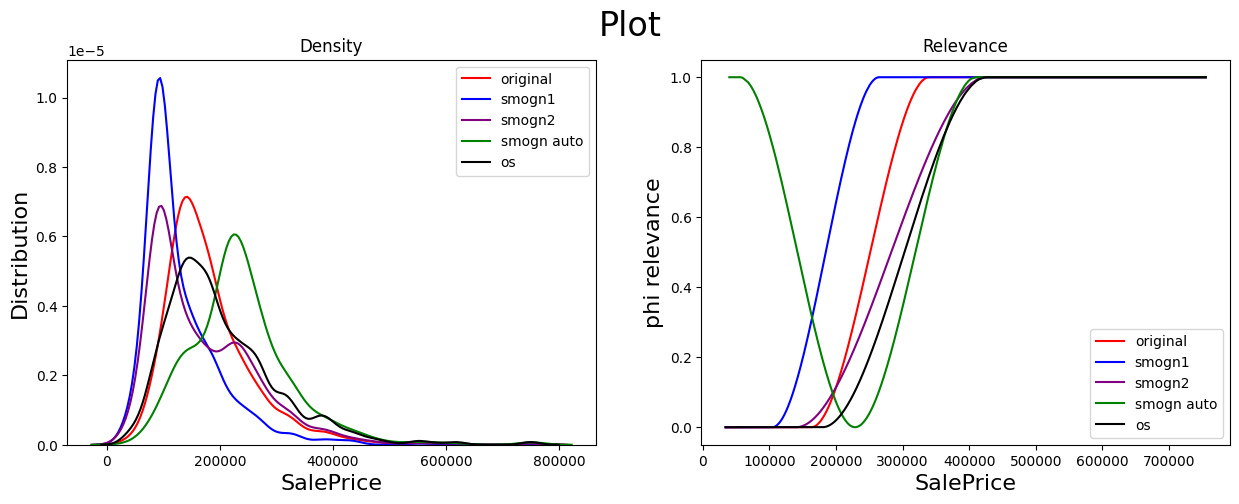

In [16]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

fig = sns.kdeplot(ax=ax1,x=y,label = "original",color='red' )
fig = sns.kdeplot(ax=ax1,x=y_smogn1,label = "smogn1",color='blue')
fig = sns.kdeplot(ax=ax1,x=y_smogn2,label = "smogn2",color='purple')
fig = sns.kdeplot(ax=ax1,x=y_smogn_auto,label = "smogn auto", color='green' )
fig = sns.kdeplot(ax=ax1,x=y_os,label = "os" , color='black')



fig.figure.suptitle("Plot", fontsize = 24)
fig.legend(labels=["original","smogn1","smogn2" ,"smogn auto","os" ])
ax1.set_xlabel('SalePrice', fontsize=16)
ax1.set_ylabel('Distribution', fontsize=16)
ax1.set_title('Density')
ax1.plot()

y_sorted, rel_y_sorted = zip(*sorted(zip(y,rel_y)))
y_smogn1_sorted, rel_y_smogn1_sorted = zip(*sorted(zip(y_smogn1,rel_y_smogn1)))
y_smogn2_sorted, rel_y_smogn2_sorted = zip(*sorted(zip(y_smogn2,rel_y_smogn2)))
y_smogn_auto_sorted, rel_y_smogn_auto_sorted = zip(*sorted(zip(y_smogn_auto,rel_y_smogn_auto)))
y_os_sorted, rel_y_os_sorted = zip(*sorted(zip(y_os,rel_y_os)))

# create a line plot
ax2.plot(y_sorted, rel_y_sorted, label='original',color='red')
ax2.plot(y_smogn1_sorted, rel_y_smogn1_sorted, label = "smogn1",color='blue')
ax2.plot(y_smogn2_sorted, rel_y_smogn2_sorted,label = "smogn2",color='purple')
ax2.plot(y_smogn_auto_sorted, rel_y_smogn_auto_sorted, label = "smogn auto", color='green' )
ax2.plot(y_os_sorted, rel_y_os_sorted, label = "os" , color='black')

# add axis labels and title
ax2.set_xlabel('SalePrice', fontsize=16)
ax2.set_ylabel('phi relevance', fontsize=16)
ax2.set_title('Relevance')

# show the plot
ax2.legend()
ax2.plot()
